In [135]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('./dataset.csv')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [137]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])


In [138]:
df_recency=df.groupby('CustomerID',as_index=False)['PurchaseDate'].max()


In [139]:
df_recency.columns=['CustomerID','LastPurchaseDate']

In [140]:
df_recency

,CustomerID,LastPurchaseDate
0,1011,2023-05-08
1,1025,2023-05-20
2,1029,2023-06-10
3,1046,2023-04-28
4,1049,2023-05-28
...,...,...
941,9941,2023-04-29
942,9950,2023-05-03
943,9954,2023-05-29
944,9985,2023-04-14


In [141]:
type(df_recency)

pandas.core.frame.DataFrame

In [142]:
recent_date = df_recency['LastPurchaseDate'].max()
recent_date

Timestamp('2023-06-10 00:00:00')

In [143]:
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

In [144]:
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,1011,2023-05-08,33
1,1025,2023-05-20,21
2,1029,2023-06-10,0
3,1046,2023-04-28,43
4,1049,2023-05-28,13


In [145]:
df['CustomerID'].value_counts()

CustomerID
7363    3
4804    3
5557    3
8317    2
2741    2
       ..
2970    1
6669    1
8836    1
1440    1
8483    1
Name: count, Length: 946, dtype: int64

2.Frequeny

In [146]:
frequency_df = df.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['PurchaseDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1


In [147]:
frequency_df['CustomerID'].value_counts()

CustomerID
9991    1
1011    1
1025    1
1029    1
1046    1
       ..
1225    1
1228    1
1230    1
1256    1
1265    1
Name: count, Length: 946, dtype: int64

3.Monetary Value

In [148]:
df['Total'] = df['TransactionAmount']  # Total spent by each customer
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72


3. Merge Recency, Frequency and Monetary Data

CustomerID de Jukto hobe...

In [149]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,1011,33,2,1129.02
1,1025,21,1,359.29
2,1029,0,1,704.99
3,1046,43,1,859.82
4,1049,13,1,225.72


In [150]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

In [151]:
rfm_df['F_rank']

0      919.5
1      448.0
2      448.0
3      448.0
4      448.0
       ...  
941    448.0
942    448.0
943    448.0
944    448.0
945    448.0
Name: F_rank, Length: 946, dtype: float64

Normalisation...

In [152]:
rfm_df['R_rank_norm'] = (rfm_df['R_rank'] / rfm_df['R_rank'].max()) * 100
rfm_df['F_rank_norm'] = (rfm_df['F_rank'] / rfm_df['F_rank'].max()) * 100
rfm_df['M_rank_norm'] = (rfm_df['M_rank'] / rfm_df['M_rank'].max()) * 100

In [153]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,1011,33,2,1129.02,443.5,919.5,926.0,47.331910,97.301587,97.885835
1,1025,21,1,359.29,606.5,448.0,304.0,64.727855,47.407407,32.135307
2,1029,0,1,704.99,937.0,448.0,632.0,100.000000,47.407407,66.807611
3,1046,43,1,859.82,261.5,448.0,788.0,27.908218,47.407407,83.298097
4,1049,13,1,225.72,738.0,448.0,201.0,78.762006,47.407407,21.247357
...,...,...,...,...,...,...,...,...,...,...
941,9941,42,1,960.53,278.5,448.0,877.0,29.722519,47.407407,92.706131
942,9950,38,1,679.11,354.0,448.0,599.0,37.780149,47.407407,63.319239
943,9954,12,1,798.01,759.5,448.0,727.0,81.056564,47.407407,76.849894
944,9985,57,1,36.10,51.5,448.0,18.0,5.496265,47.407407,1.902748


In [154]:
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1011,33,2,1129.02,47.331910,97.301587,97.885835
1,1025,21,1,359.29,64.727855,47.407407,32.135307
2,1029,0,1,704.99,100.000000,47.407407,66.807611
3,1046,43,1,859.82,27.908218,47.407407,83.298097
4,1049,13,1,225.72,78.762006,47.407407,21.247357
...,...,...,...,...,...,...,...
941,9941,42,1,960.53,29.722519,47.407407,92.706131
942,9950,38,1,679.11,37.780149,47.407407,63.319239
943,9954,12,1,798.01,81.056564,47.407407,76.849894
944,9985,57,1,36.10,5.496265,47.407407,1.902748


In [155]:
rfm_df['RFM_Score'] = 0.15 * rfm_df['R_rank_norm'] + 0.28 * rfm_df['F_rank_norm'] + 0.57 * rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

In [156]:
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,1011,4.51
1,1025,2.07
2,1029,3.32
3,1046,3.25
4,1049,1.86
5,1082,2.69
6,1086,1.53


In [157]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers",
                                       np.where(rfm_df['RFM_Score'] > 4, "High value Customer",
                                                np.where(rfm_df['RFM_Score'] > 3, "Medium Value Customer",
                                                         np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))

In [158]:
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,1011,4.51,Top Customers
1,1025,2.07,Low Value Customers
2,1029,3.32,Medium Value Customer
3,1046,3.25,Medium Value Customer
4,1049,1.86,Low Value Customers
5,1082,2.69,Low Value Customers
6,1086,1.53,Lost Customers
7,1104,1.38,Lost Customers
8,1108,3.51,Medium Value Customer
9,1120,3.84,Medium Value Customer


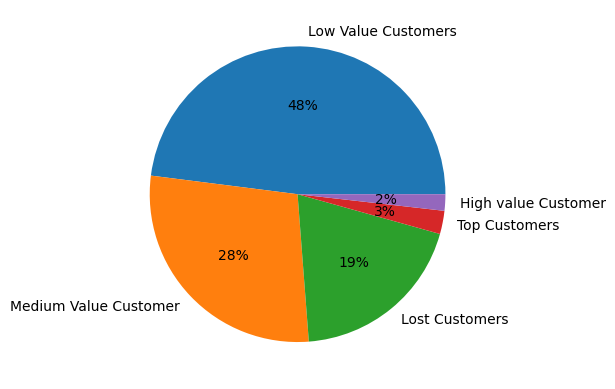

In [159]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()